In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('email.csv')

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data = data.dropna()
#seeing the type of no binary values are given and then converting it to binary
print("Unique values in the email data set: ", data['Category'].unique())

Unique values in the email data set:  ['ham' 'spam' '{"mode":"full"']


In [9]:
binary_columns = ['Category']
#converting it to 1/0
data[binary_columns] = data[binary_columns].apply(lambda x : x.map({'ham': 0, 'spam' : 1}))
#printing the updated unique values
print("Updated Unique Values: ", data['Category'].unique())

Updated Unique Values:  [ 0.  1. nan]


Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



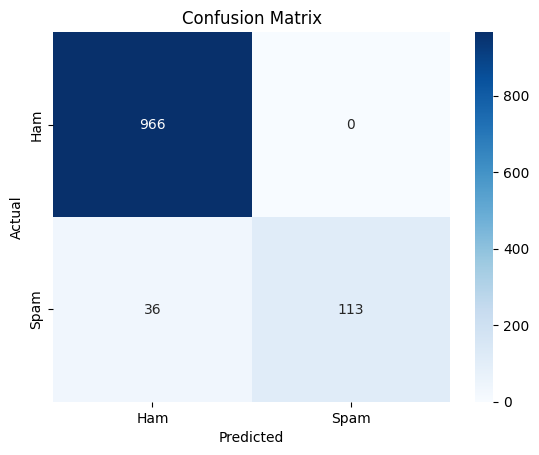


New Email Prediction: Ham


In [ ]:
import seaborn as sns
#training the model to classify emials
# Split into training and testing sets
data = data[['Category', 'Message']].dropna()
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

new_email = ["URGENT: Your account has been compromised, click here to reset"]
new_tfidf = vectorizer.transform(new_email)
prediction = model.predict(new_tfidf)[0]
print("New Email Prediction:", "Spam" if prediction == 1 else "Ham")